<a href="https://colab.research.google.com/github/JuliMillan/Diversidad_rol/blob/main/World_cloud_rol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Word Cloud

Para que la encuesta siga siendo anónima, no puedo subir el archivo con la parte de los comentarios. Así que este es el código pero no se podrá encontrar la parte de los comentarios en el dataset

In [16]:
from wordcloud import WordCloud
from collections import Counter
import string
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
archivo = "/content/drive/MyDrive/Copia de Diversidad sexual y de género en el mundo de los juegos de rol (respuestas) - Respuestas de formulario 1.csv"
df = pd.read_csv(archivo)

In [7]:
df.columns = [
              'fecha', 'edad', 'juegos', 'rol', 'genero', 'identidad', 'sexualidad', 
              'discriminacion_personal', 'discriminacion_otre', 'reaccion',
              'grupo', 'nacimiento', 'residencia', 'comentario'
              ]

In [8]:
frases = ' '.join(df['comentario'].dropna().to_list())
#frases

In [9]:
palabras = [palabra.strip(string.punctuation) for palabra in frases.split()]

In [10]:
contador_palabras=Counter(palabras)
palabras_ordenadas = sorted(contador_palabras.items(), key=lambda x: x[1], reverse=True)

#for i in palabras_ordenadas:
#	print(i[0], i[1])

In [11]:
#Elijo ciertas palabras significativas porque sino las que aparecen con más frecuencia son conectores
pal= ['adolescente', 'segregado','hetero','chicas','partidas','sexo','rol',
      'mesas', 'discriminación', 'personaje', 'juego', 'experiencia', 'amigos', 
      'personas','mujeres', 'grupos', 'sexual', 'varones', 'cis', 'queer', 
      'rolear','ignorancia','sexo','vida','personas','mesa', 'mujer', 'hombres',
      'mundo', 'varones','jugar','orientación', 'pregunta', 'género', 'confianza', 
      'inclusivo', 'alguien','confianza', 'Creo', 'sé', 'uso','interpretar',
      'distinto', 'medio','parte','falta','grupo','gente','mesa']

palabras_filtradas = {}
for key, value in contador_palabras.items():
    if (key in pal):
        palabras_filtradas[key] = value

#print(palabras_filtradas)

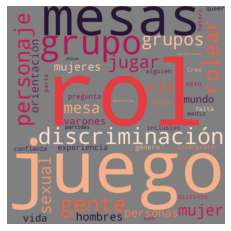

In [17]:
nube_palabras = WordCloud(width = 1000, height = 1000, colormap='rocket',
                          background_color="grey").generate_from_frequencies(palabras_filtradas)
plt.imshow(nube_palabras, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()